In [4]:
#### REETAYAN DAS###

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [6]:
tf_mini = pd.read_csv(r'F:\AppliedDataScience\data\track_features\tf_mini.csv')
log_mini = pd.read_csv(r'F:\AppliedDataScience\data\training_set\log_mini.csv')

In [7]:
tf_mini.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [8]:
log_mini.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [9]:
tf_mini.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [10]:
sample = pd.read_csv(r'F:\AppliedDataScience\data\data.csv')

In [11]:
sample.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [12]:
sample.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [13]:
log_mini.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [14]:
tf_mini.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [15]:
tf_mini.head(2)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.02858,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.12386,0.746904,0.371803,-0.420558,-0.213120,-0.525795


In [16]:
log_mini.head(2)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [17]:
len(log_mini)

167880

In [18]:
len(tf_mini)

50704

In [19]:
df = log_mini

In [20]:
tf_mini = tf_mini.dropna()

In [21]:
len(tf_mini)

50704

In [22]:
### creating label

In [23]:
df['label'] = np.where((df['not_skipped'] == True) | 
                       (df['hist_user_behavior_is_shuffle'] == True) & 
                       (df['hour_of_day'] > 12), 1, 0)

In [24]:
df

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,label
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,20,t_c815228b-3212-4f9e-9d4f-9cb19b248184,False,False,True,False,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,fwdbtn,1
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,20,t_e23c19f5-4c32-4557-aa44-81372c2e3705,True,True,True,False,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,1
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,20,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,True,True,True,False,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,1
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,20,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,False,True,True,False,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,1
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,True,True,True,False,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,1


In [25]:
%matplotlib inline

In [26]:
#import matplotlib.pyplot as plt
#plt.hist(df['label'])

In [27]:
import seaborn as sns
label = df[['label']]

In [28]:
type(label)

pandas.core.frame.DataFrame

C:\Users\Ted\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


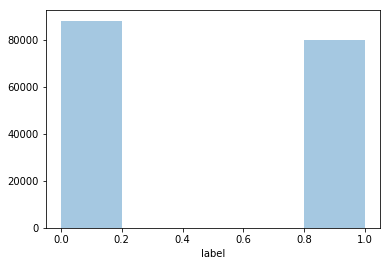

In [29]:

sns.distplot(df['label'],bins = 5,kde = False)

In [30]:
len(df)

167880

In [31]:
len(tf_mini)

50704

In [32]:
df_1 = df.head(50704)

In [33]:
len(df_1)

50704

In [34]:
df_1.rename(columns = {'track_id_clean':'track_id'}, inplace = True) 

C:\Users\Ted\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [35]:
df_1.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,label
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,1


In [36]:
#### merging Both Dataframes

In [37]:
df_merge_col_1 = pd.merge(df_1, tf_mini, on='track_id')

In [38]:
df_merge_col_1.head(2)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [39]:
len(df_merge_col_1)

50704

In [40]:
#### Merging both Dataframes before cutting short

In [41]:
df2 = df

In [42]:
df2.rename(columns = {'track_id_clean':'track_id'}, inplace = True) 

In [43]:
df_merge_col_2 = pd.merge(df2, tf_mini, on='track_id')

In [44]:
len(df_merge_col_2)

167880

In [45]:
df_merge_col_2 = df_merge_col_2.dropna()

In [46]:
len(df_merge_col_2)

167880

In [47]:
df_merge_col_2.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'label', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
   

In [48]:
dat = df_merge_col_2

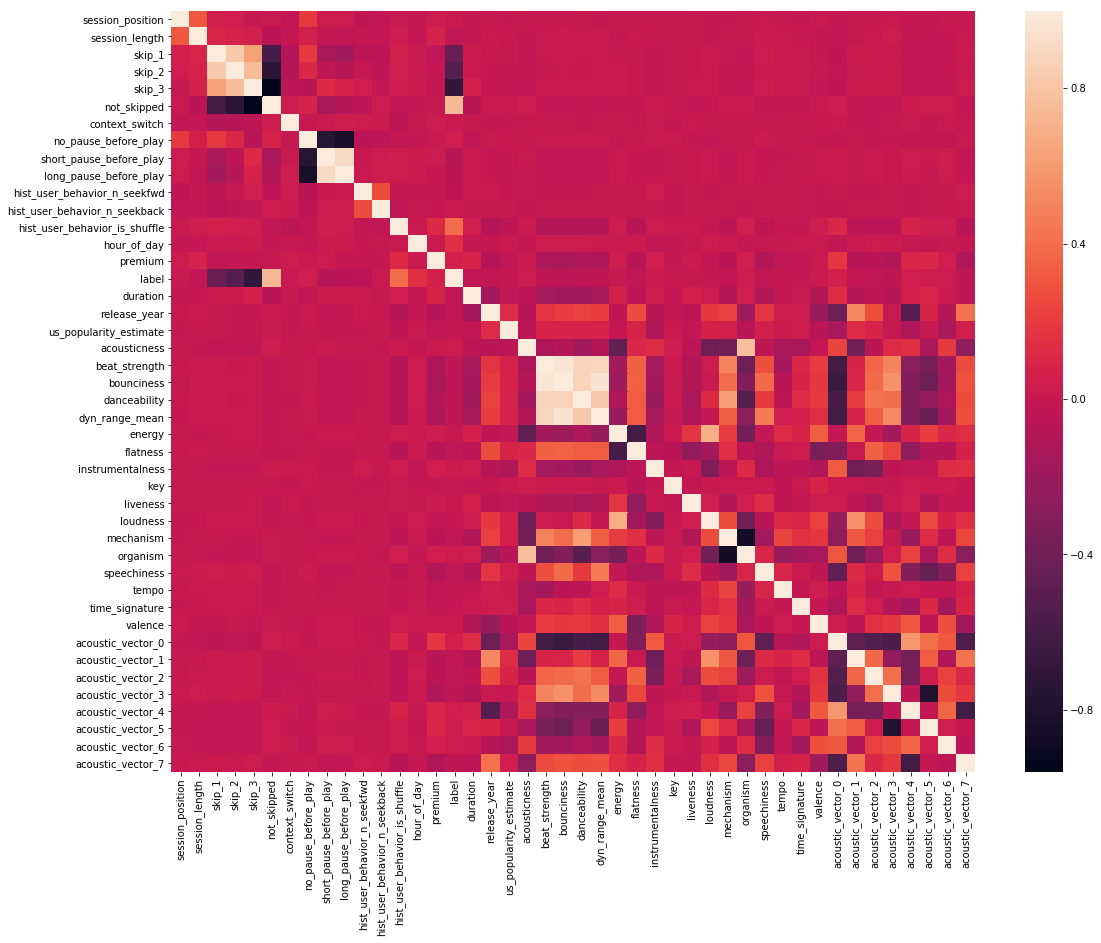

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 14))
sns.heatmap(dat.corr())

In [50]:
features = dat

In [51]:

#features = features.drop('label', axis=1)

In [52]:
features.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'label', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
   

In [53]:
ff1 = features[['not_skipped','hist_user_behavior_is_shuffle']]

In [54]:
y = dat[['label']]

In [55]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\Ted\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [56]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 51 columns):
session_id                         167880 non-null object
session_position                   167880 non-null int64
session_length                     167880 non-null int64
track_id                           167880 non-null object
skip_1                             167880 non-null bool
skip_2                             167880 non-null bool
skip_3                             167880 non-null bool
not_skipped                        167880 non-null bool
context_switch                     167880 non-null int64
no_pause_before_play               167880 non-null int64
short_pause_before_play            167880 non-null int64
long_pause_before_play             167880 non-null int64
hist_user_behavior_n_seekfwd       167880 non-null int64
hist_user_behavior_n_seekback      167880 non-null int64
hist_user_behavior_is_shuffle      167880 non-null bool
hour_of_day                        16

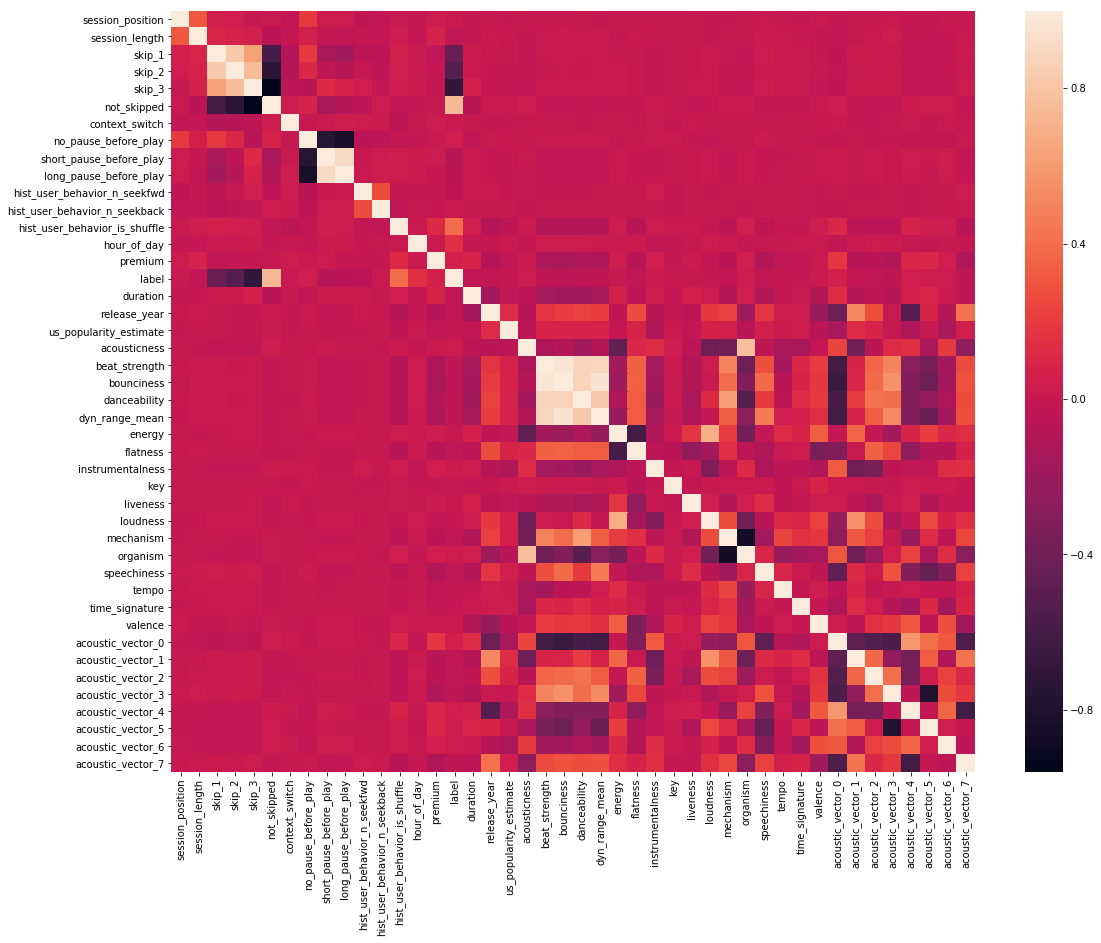

In [57]:
plt.figure(figsize=(18, 14))
sns.heatmap(features.corr())

In [74]:
ff1.head()

,0,1
0,0,False
1,0,False
2,1,False
3,1,False
4,0,True


In [69]:
ff1.shape

(2, 167880)

In [75]:
#ff1 = ff1.values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ff1[1] = le.fit_transform(ff1[1])


In [73]:
ff1 = pd.DataFrame(ff1)

In [88]:
ff1.shape

(167880, 2)

In [70]:
ff1 = ff1.transpose()

In [76]:
y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [77]:
y = y.values

In [78]:
ff1 = ff1.values

In [79]:
ff1

array([[0, 0],
       [0, 0],
       [1, 0],
       ...,
       [1, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [80]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ff1,y,test_size=1/4,random_state=0)

C:\Users\Ted\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Ted\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
y_pred=logreg.predict(x_test)

In [83]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [84]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19131,  2918],
       [    1, 19920]], dtype=int64)

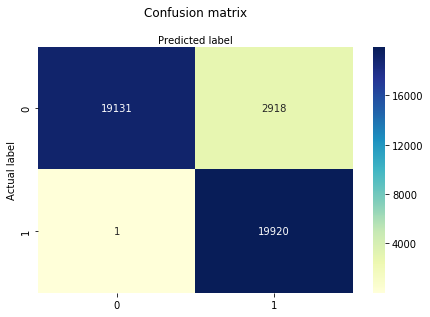

Accuracy: 0.9304503216583274
Precision: 0.8722304930379192
Recall: 0.9999498017167813


In [85]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [86]:
features

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
5,0_01f86af2-cf48-42a6-9bf8-adb91f072909,7,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,1,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
6,0_02340c3b-c370-4c98-b759-87be85e11aa3,8,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,1,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
7,0_02a8ebbd-5a12-4343-a7da-2ea912102f90,2,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,False,0,1,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
8,0_032c39c8-3a11-4f90-a3c5-38461b4d365d,13,19,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,1,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
9,0_03373b7c-3c30-4bac-a909-1a4ecc310797,5,19,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,False,1,1,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826


In [87]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [88]:
len(y_pred)

41970

In [89]:
### In y_pred where gets 1 means there we should break the boundary(recommend other genres) and
###0 means we shouldnt break the boundary (recommend another song from the same genres)

In [90]:
len(y)

167880

In [91]:
len(y_train)

125910

In [92]:
len(y_test)

41970

In [93]:
len(y_pred)

41970

In [94]:
#y2 = np.concatenate((y_train, y_pred))

In [95]:
y_train.shape

(125910, 1)

In [96]:
y_pred = y_pred.reshape(-1,1)

In [97]:
y_pred.shape

(41970, 1)

In [98]:
y2 = np.concatenate((y_train, y_pred))

In [99]:
y2 = pd.DataFrame(y2)

In [100]:
y2.head()

,0
0,1
1,0
2,1
3,0
4,0


In [101]:
y = pd.DataFrame(y)

In [102]:
y.head()

,0
0,1
1,0
2,1
3,1
4,1


In [103]:
dat['predicted_output'] = y2

In [104]:
dat.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'label', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7', 'pre

In [105]:
dat.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,predicted_output
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,1,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0


C:\Users\Ted\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


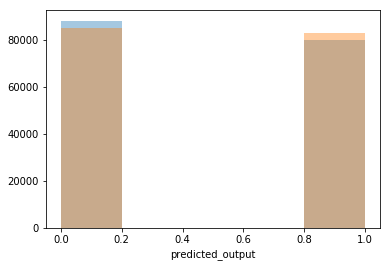

In [106]:
sns.distplot(dat['label'],bins = 5,kde = False)
sns.distplot(dat['predicted_output'],bins = 5,kde = False)

In [107]:
### align the predicted column with the track id

In [108]:
break_bubble = dat.query('predicted_output==1')['track_id']
dont_break_bubble = dat.query('predicted_output==0')['track_id']

In [109]:
len(break_bubble)

82702

In [110]:
len(dont_break_bubble)

85178

In [111]:
break_bubble.head(34)

0     t_0479f24c-27d2-46d6-a00c-7ec928f2b539
2     t_0479f24c-27d2-46d6-a00c-7ec928f2b539
5     t_0479f24c-27d2-46d6-a00c-7ec928f2b539
8     t_0479f24c-27d2-46d6-a00c-7ec928f2b539
9     t_0479f24c-27d2-46d6-a00c-7ec928f2b539
11    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
12    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
14    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
16    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
17    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
18    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
19    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
21    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
23    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
25    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
27    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
29    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
31    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
32    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
33    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
35    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
36    t_0479f24c-27d2-46d6-a00c-7ec928f2b539
37    t_04

In [112]:
type(break_bubble)

pandas.core.series.Series

In [113]:
break_bubble = pd.DataFrame(break_bubble)

In [114]:
break_bubble.head(5)

,track_id
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
2,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
5,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
8,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
9,t_0479f24c-27d2-46d6-a00c-7ec928f2b539


In [115]:
dont_break_bubble = pd.DataFrame(dont_break_bubble)

In [116]:
dont_break_bubble.head(5)

,track_id
1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
3,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
4,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
6,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
7,t_0479f24c-27d2-46d6-a00c-7ec928f2b539


In [117]:
#sns.distplot(break_bubble.index,bins = 5)
#sns.distplot(dont_break_bubble.index,bins = 5)

In [118]:
#plt.hist(break_bubble.index,bins = 30)
#plt.hist(dont_break_bubble.index,bins = 30)

In [119]:
##### Find the unique values from the Dataframe of break_bubble#####

In [120]:
bubble_uid = break_bubble.track_id.unique()

In [121]:
type(bubble_uid)

numpy.ndarray

In [122]:
bubble_uid = pd.DataFrame(bubble_uid)

In [123]:
len(bubble_uid)

33049

In [124]:
bubble_uid.rename(columns = {0:'track_id'}, inplace = True) 

In [125]:
bubble_uid.head()

,track_id
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123


In [126]:
##### Find the unique values from the Dataframe of dont_break_bubble#####

In [127]:
no_bubble_uid = dont_break_bubble.track_id.unique()
no_bubble_uid = pd.DataFrame(no_bubble_uid)
print(len(no_bubble_uid))
no_bubble_uid.rename(columns = {0:'track_id'}, inplace = True) 
no_bubble_uid.head()

31289


,track_id
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123


In [128]:
bcounts = break_bubble.track_id.value_counts()
no_bcounts = dont_break_bubble.track_id.value_counts()
bcounts = pd.DataFrame(bcounts)
no_bcounts = pd.DataFrame(no_bcounts)

In [129]:
bcounts.head(5)


,track_id
t_bacf06d3-9185-4183-84ea-ff0db51475ce,696
t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,417
t_8c4d29b1-e0bf-464c-88f7-ac19240cbba0,372
t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,361
t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,344


In [130]:
bcounts.reset_index(level=0, inplace=True)
no_bcounts.reset_index(level=0, inplace=True)


In [131]:
no_bcounts.head()

,index,track_id
0,t_bacf06d3-9185-4183-84ea-ff0db51475ce,731
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,498
2,t_8c4d29b1-e0bf-464c-88f7-ac19240cbba0,413
3,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,386
4,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,358


In [132]:
bcounts.head()

,index,track_id
0,t_bacf06d3-9185-4183-84ea-ff0db51475ce,696
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,417
2,t_8c4d29b1-e0bf-464c-88f7-ac19240cbba0,372
3,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,361
4,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,344


In [133]:
#### renaming columns of bcounts and no_bcounts

In [134]:

bcounts.rename(columns = {'track_id':'track_frequency'}, inplace = True) 

In [135]:

bcounts.rename(columns = {'index':'track_id'}, inplace = True) 

In [136]:
bcounts.head()

,track_id,track_frequency
0,t_bacf06d3-9185-4183-84ea-ff0db51475ce,696
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,417
2,t_8c4d29b1-e0bf-464c-88f7-ac19240cbba0,372
3,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,361
4,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,344


In [137]:
no_bcounts.rename(columns = {'track_id':'track_frequency'}, inplace = True) 
no_bcounts.rename(columns = {'index':'track_id'}, inplace = True) 
no_bcounts.head()

,track_id,track_frequency
0,t_bacf06d3-9185-4183-84ea-ff0db51475ce,731
1,t_5718ab08-3a15-4d3f-9e63-42b2f6805e31,498
2,t_8c4d29b1-e0bf-464c-88f7-ac19240cbba0,413
3,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,386
4,t_77b02acb-1b1f-4b36-b8fc-2c3e01892b9a,358


In [138]:
bubble_uid_final = pd.merge(bubble_uid,bcounts, on = 'track_id')

In [139]:
bubble_uid_final.head()

,track_id,track_frequency
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,25
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,1
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,137
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,11
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,61


In [140]:
no_bubble_uid_final = pd.merge(no_bubble_uid,no_bcounts, on = 'track_id')




In [141]:
no_bubble_uid_final.head()

,track_id,track_frequency
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,20
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,4
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,140
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,15
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,61


C:\Users\Ted\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ted\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


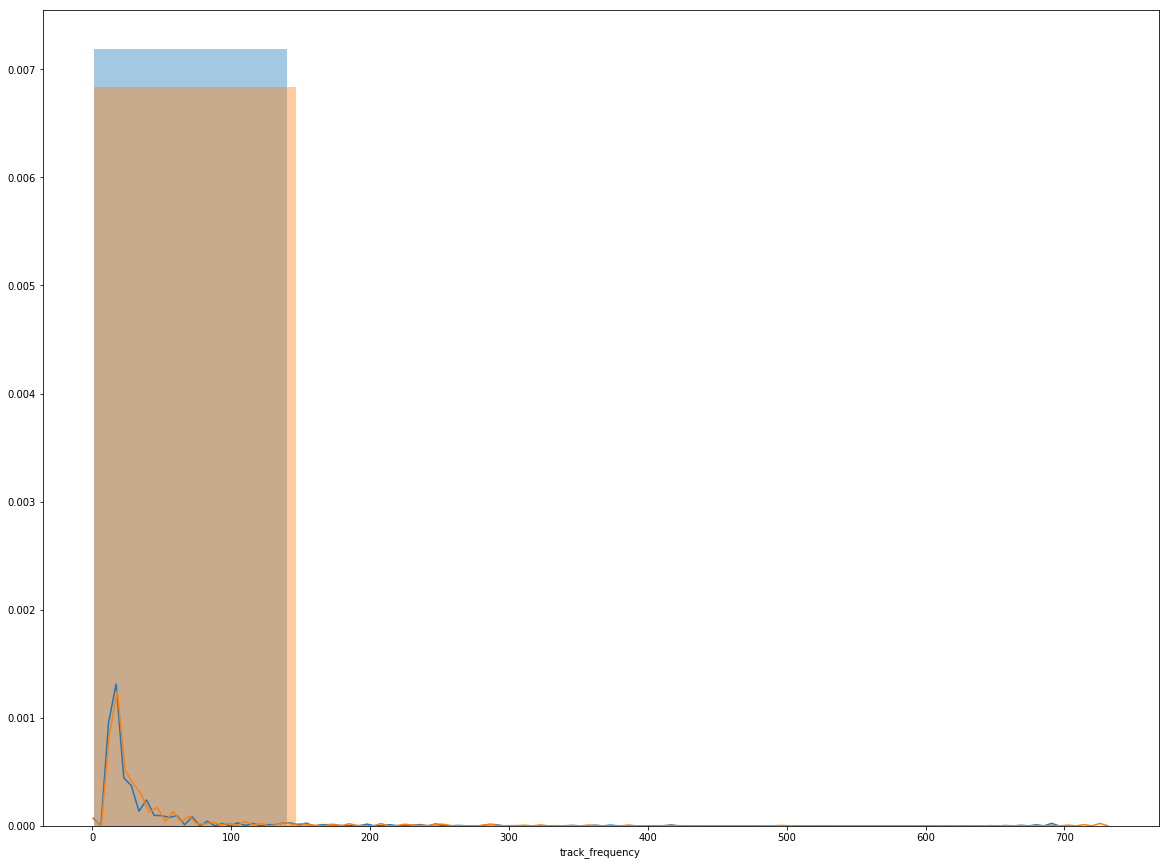

In [142]:
plt.figure(figsize=(20, 15))
sns.distplot(bubble_uid_final['track_frequency'],bins = 5)
sns.distplot(no_bubble_uid_final['track_frequency'],bins = 5)


In [144]:
dat.to_csv(r'F:\AppliedDataScience\data\dat.csv')

In [143]:
dat.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'label', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7', 'pre

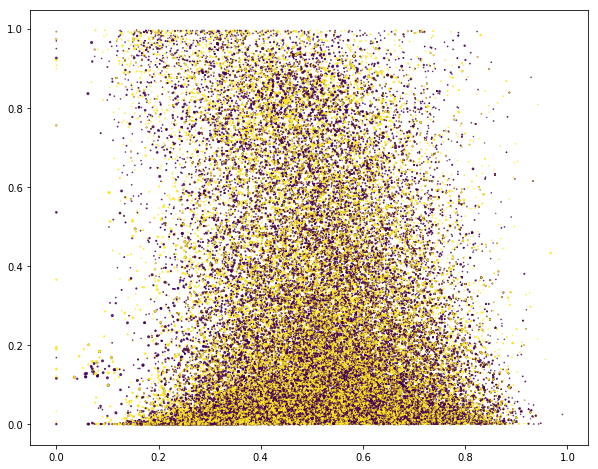

In [159]:
plt.figure(figsize=(10, 8))
plt.scatter(dat['beat_strength'],dat['acousticness'],s = dat['liveness']/0.235,c = dat['predicted_output'], alpha=0.8)
plt.show()

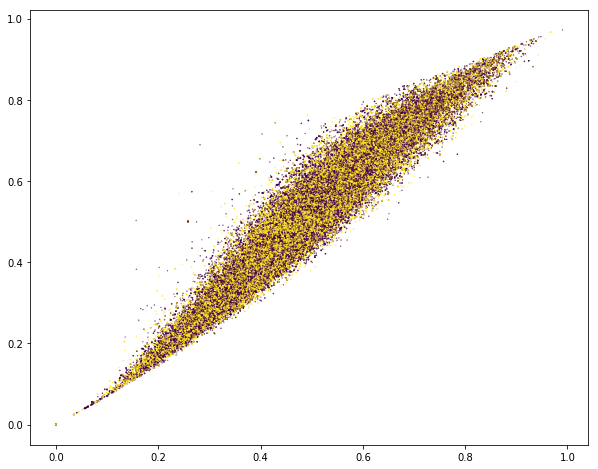

In [160]:
plt.figure(figsize=(10, 8))
plt.scatter(dat['beat_strength'],dat['bounciness'] ,s = dat['liveness'],c = dat['predicted_output'], alpha=1.2)
plt.show()

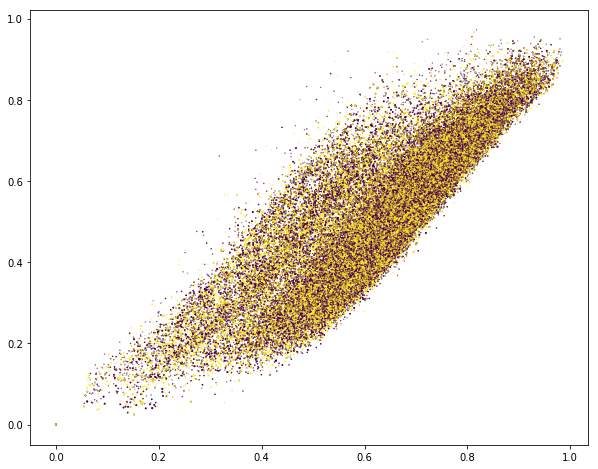

In [162]:
plt.figure(figsize=(10, 8))
plt.scatter(dat['danceability'],dat['bounciness'],s = dat['liveness'],c = dat['predicted_output'], alpha=1.2)
plt.show()

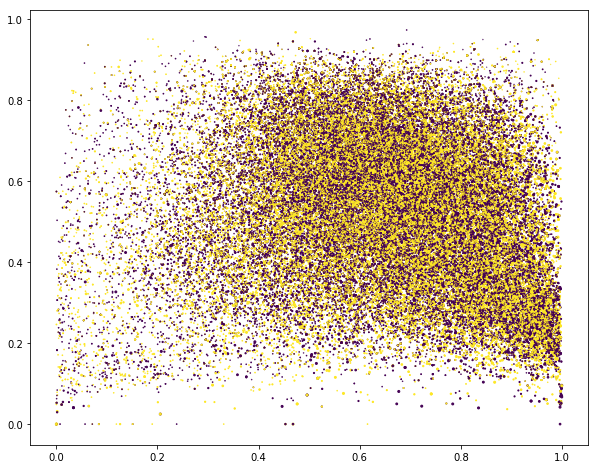

In [168]:
plt.figure(figsize=(10, 8))
plt.scatter(dat['energy'],dat['bounciness'],s = dat['liveness']/0.235,c = dat['predicted_output'], alpha=1.2)

plt.show()

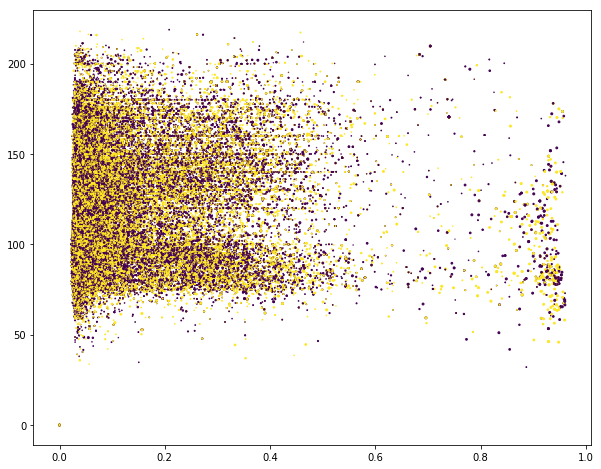

In [166]:
plt.figure(figsize=(10, 8))
plt.scatter(dat['speechiness'],dat['tempo'],s = dat['liveness']/0.235,c = dat['predicted_output'], alpha=1.2)
plt.show()

In [170]:
#### User profiling about Break_bubble and Dont_Break_Bubble track ID

In [175]:
break_bubble.head()


,track_id
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
2,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
5,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
8,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
9,t_0479f24c-27d2-46d6-a00c-7ec928f2b539


In [174]:
dont_break_bubble.head()

,track_id
1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
3,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
4,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
6,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
7,t_0479f24c-27d2-46d6-a00c-7ec928f2b539


In [177]:
dat.head(2)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,predicted_output
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0


In [180]:
dat.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'label', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7', 'pre

In [185]:
#user_break_bubble = dat.query('index==break_bubble.index')['hist_user_behavior_is_shuffle']


## Right Index Merge for those User profile's trakc ID for bubble

In [195]:
# Merge two Dataframes on index of both the dataframes
user_profile_bb= break_bubble.merge(dat, left_index=True, right_index=True)
user_profile_no_bb= dont_break_bubble.merge(dat, left_index=True, right_index=True)

In [196]:
user_profile_bb.head()

,track_id_x,session_id,session_position,session_length,track_id_y,skip_1,skip_2,skip_3,not_skipped,context_switch,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,predicted_output
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
2,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
5,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_01f86af2-cf48-42a6-9bf8-adb91f072909,7,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
8,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_032c39c8-3a11-4f90-a3c5-38461b4d365d,13,19,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1
9,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_03373b7c-3c30-4bac-a909-1a4ecc310797,5,19,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,False,1,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,1


In [197]:
user_profile_no_bb.head()

,track_id_x,session_id,session_position,session_length,track_id_y,skip_1,skip_2,skip_3,not_skipped,context_switch,...,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,predicted_output
1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0
3,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0
4,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0
6,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_02340c3b-c370-4c98-b759-87be85e11aa3,8,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,True,True,True,False,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0
7,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_02a8ebbd-5a12-4343-a7da-2ea912102f90,2,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,False,0,...,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0


In [193]:
user_profile_bb.columns

Index(['track_id_x', 'session_id', 'session_position', 'session_length',
       'track_id_y', 'skip_1', 'skip_2', 'skip_3', 'not_skipped',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'label', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic

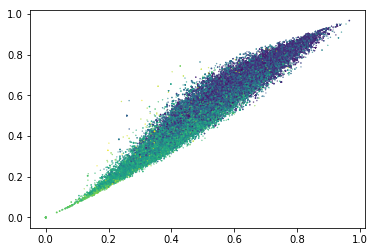

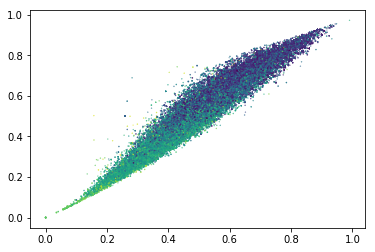

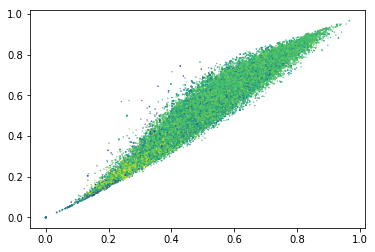

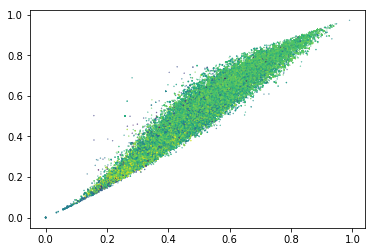

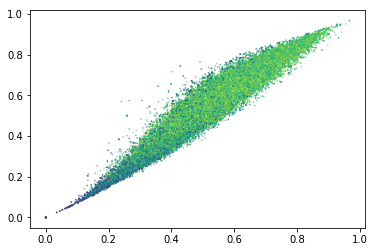

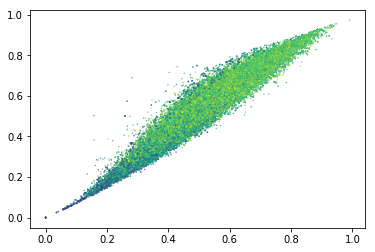

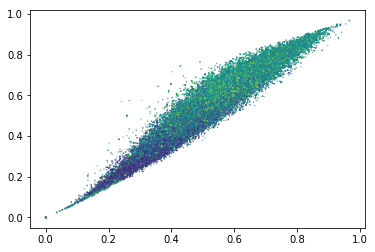

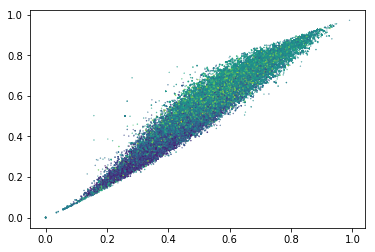

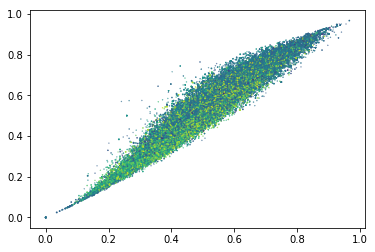

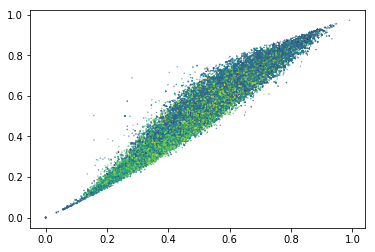

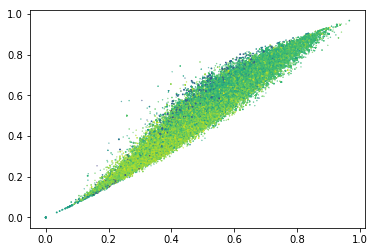

In [210]:

plt.scatter(user_profile_bb['beat_strength'],user_profile_bb['bounciness'] , s = user_profile_bb['liveness'],c = user_profile_bb['acoustic_vector_0'], alpha=1.2)

plt.show()

plt.scatter(user_profile_no_bb['beat_strength'],user_profile_no_bb['bounciness'] ,s = user_profile_no_bb['liveness'],c = user_profile_no_bb['acoustic_vector_0'], alpha=1.2)

plt.show()
plt.scatter(user_profile_bb['beat_strength'],user_profile_bb['bounciness'] ,s = user_profile_bb['liveness'],c = user_profile_bb['acoustic_vector_1'], alpha=1.2)

plt.show()

plt.scatter(user_profile_no_bb['beat_strength'],user_profile_no_bb['bounciness'] ,s = user_profile_no_bb['liveness'],c = user_profile_no_bb['acoustic_vector_1'], alpha=1.2)
plt.show()
plt.scatter(user_profile_bb['beat_strength'],user_profile_bb['bounciness'] ,s = user_profile_bb['liveness'],c = user_profile_bb['acoustic_vector_2'], alpha=1.2)
plt.show()


plt.scatter(user_profile_no_bb['beat_strength'],user_profile_no_bb['bounciness'] ,s = user_profile_no_bb['liveness'],c = user_profile_no_bb['acoustic_vector_2'], alpha=1.2)
plt.show()
plt.scatter(user_profile_bb['beat_strength'],user_profile_bb['bounciness'] ,s = user_profile_bb['liveness'],c = user_profile_bb['acoustic_vector_3'], alpha=1.2)
plt.show()


plt.scatter(user_profile_no_bb['beat_strength'],user_profile_no_bb['bounciness'] ,s = user_profile_no_bb['liveness'],c = user_profile_no_bb['acoustic_vector_3'], alpha=1.2)
plt.show()
plt.scatter(user_profile_bb['beat_strength'],user_profile_bb['bounciness'] ,s = user_profile_bb['liveness'],c = user_profile_bb['acoustic_vector_4'], alpha=1.2)
plt.show()

plt.scatter(user_profile_no_bb['beat_strength'],user_profile_no_bb['bounciness'] ,s = user_profile_no_bb['liveness'],c = user_profile_no_bb['acoustic_vector_4'], alpha=1.2)
plt.show()
plt.scatter(user_profile_bb['beat_strength'],user_profile_bb['bounciness'] ,s = user_profile_bb['liveness'],c = user_profile_bb['acoustic_vector_5'], alpha=1.2)
plt.show()

#plt.scatter(user_profile_no_bb['beat_strength'],user_profile_no_bb['bounciness'] ,s = user_profile_no_bb['liveness'],c = user_profile_no_bb['acoustic_vector_5'], alpha=1.2)
plt.show()
